In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [35]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')

In [36]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df.pop('Time')

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

# EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

The above output shows the data types and non null values. All the variables a numeric, therefore there is no need for one hot encdoing and there are no null values in the dataset.

In [39]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


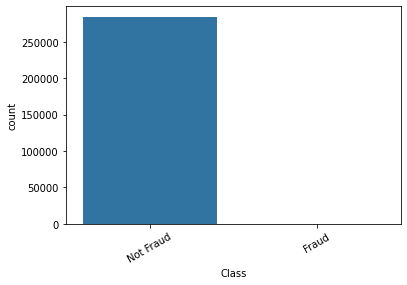

In [40]:
fig = sns.countplot(x = 'Class', data = df)
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=30);

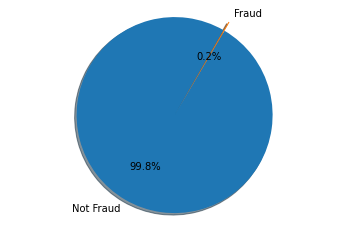

In [41]:
plt.pie(df['Class'].value_counts(), explode=(0, 0.1), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%',
        shadow=True, startangle=60)
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Amount'>

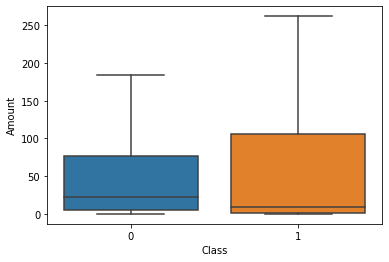

In [42]:
sns.boxplot(x = "Class", y = "Amount",data = df,showfliers=False)

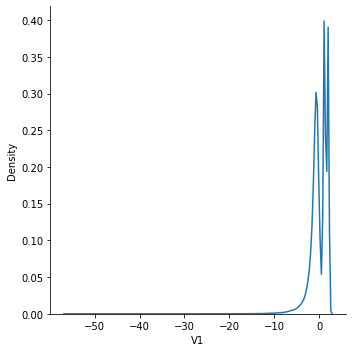

In [43]:
sns.displot(x = 'V1', data=df, kind = 'kde')

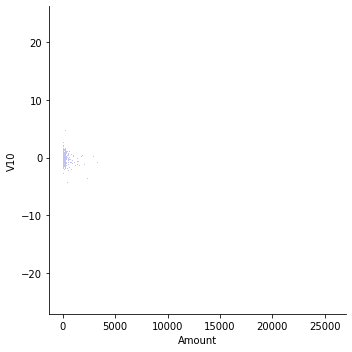

In [44]:
sns.displot(x = 'Amount', y = 'V10', data = df, color = 'blue')

Text(0, 0.5, 'Amount')

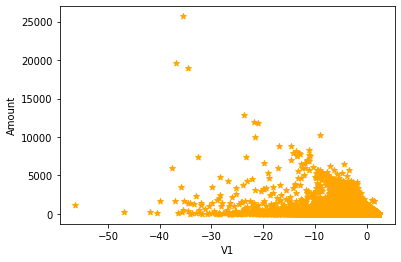

In [45]:
plt.scatter(df.V1, df.Amount, marker = '*',c = "orange")
plt.xlabel('V1')
plt.ylabel('Amount')

<AxesSubplot:>

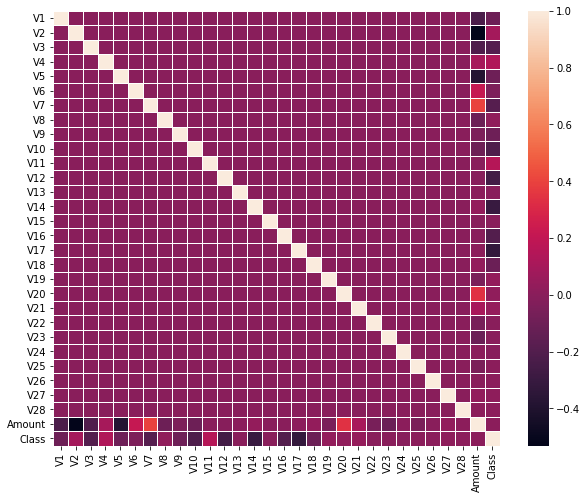

In [46]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=False,linewidths=0.5)

# Preprocessing and Modeling

In [47]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [49]:
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [50]:
nn= tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=6, activation= "relu"))
nn.add(tf.keras.layers.Dense(units=6, activation= "relu"))
nn.add(tf.keras.layers.Dense(units=1, activation= "sigmoid"))

In [51]:
nn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [52]:
nn.fit(x_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0560 - accuracy: 0.9949
Epoch 2/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 3/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 5/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 7/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0030 - accuracy: 0.9993
Epoch 8/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 9/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 10/10
7121/7121 [==============================] - 8s 1ms/step - loss: 0.002


# Predictions before balancing

In [53]:
y_pred= nn.predict(x_test)

In [54]:
for i in range(y_pred.size):
    y_pred[i]= 1 if y_pred[i]>0.5 else 0

In [55]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[56849    15]
 [   19    79]]


0.999403110845827

# Balancing data

In [56]:
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=124)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
df_upsampled.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

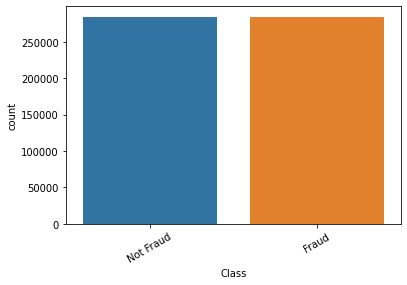

In [60]:
fig = sns.countplot(x = 'Class', data = df_upsampled)
fig.set_xticklabels(labels=['Not Fraud', 'Fraud'], rotation=30);

# Re-train the model

In [70]:
x = df_upsampled.drop('Class', axis = 1)
y = df_upsampled['Class']

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [72]:
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [73]:
ann= tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation= "relu"))
ann.add(tf.keras.layers.Dense(units=6, activation= "relu"))
ann.add(tf.keras.layers.Dense(units=1, activation= "sigmoid"))

In [74]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [75]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
14216/14216 [==============================] - 16s 1ms/step - loss: 0.1547 - accuracy: 0.9401
Epoch 2/10
14216/14216 [==============================] - 15s 1ms/step - loss: 0.0840 - accuracy: 0.9645
Epoch 3/10
14216/14216 [==============================] - 16s 1ms/step - loss: 0.0724 - accuracy: 0.9711
Epoch 4/10
14216/14216 [==============================] - 16s 1ms/step - loss: 0.0679 - accuracy: 0.9737
Epoch 5/10
14216/14216 [==============================] - 16s 1ms/step - loss: 0.0646 - accuracy: 0.9753
Epoch 6/10
14216/14216 [==============================] - 16s 1ms/step - loss: 0.0616 - accuracy: 0.9771
Epoch 7/10
14216/14216 [==============================] - 16s 1ms/step - loss: 0.0593 - accuracy: 0.9786
Epoch 8/10
14216/14216 [==============================] - 16s 1ms/step - loss: 0.0579 - accuracy: 0.9793
Epoch 9/10
14216/14216 [==============================] - 16s 1ms/step - loss: 0.0558 - accuracy: 0.9804
Epoch 10/10
14216/14216 [==============================

# Predictions after balancing

In [79]:
y_pred= ann.predict(x_test)

In [80]:
for i in range(y_pred.size):
    y_pred[i]= 1 if y_pred[i]>0.5 else 0

In [81]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[55456  1290]
 [  702 56278]]


0.9824842164500642